# Supplementary figure 5: subsampling and permutation to explore the effect of cell number on CCC

In this notebook, we explore the effect of different number of cells between the defined locations, as maybe the number of cells in the location is influencing the number of predicted CCC

In [1]:
global_path = './cell-cell-communication/' ## Path to the github downloaded repository

In [2]:
import scanpy as sc
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.patches as mpatches
import matplotlib
import seaborn as sns
import numpy as np
import pickle
import random
import ktplotspy as kpy
from cellphonedb.src.core.methods import cpdb_statistical_analysis_method
from collections import Counter
from tqdm import tqdm

import sys
sys.path.insert(1, global_path + 'Functions/')
from downstream_analysis import run_cellphonedb, create_filtered_adata_CP_subsampling, boxplot_subsampling
plt.rcParams['font.family'] = 'FreeSans' 
from adjustText import adjust_text
title_size = 12
labelout_size = 10
label_size = 8
ticks_size = 6

In [3]:
def counts_matrix(adatafile, metafile, pvalsfile): 

    adata = sc.read(adatafile)
    pvalues = pd.read_csv(pvalsfile, sep = '\t')
    meta = pd.read_csv(metafile, sep = '\t')
    adata.obs['cell_type_cyto'] = meta.cell_type.tolist()

    counts = kpy.plot_cpdb_heatmap(
        adata = adata,
        pvals = pvalues,
        celltype_key = "cell_type_cyto",
        figsize = (10,10),
        title = "Number of significant interactions",
        symmetrical = True,
        return_tables = True
    )

    return counts['count_network']


def select_index_cancer(adata, list_labels, n_ccells, index_no_cancer):
    ind_selected = []
    for i in list_labels: 
        ind_total = adata.obs[adata.obs.cell_type_cyto == i].index
        ind_selected.append(np.random.choice(ind_total, n_ccells, replace=False))

    selected_ind_CP = np.concatenate([np.concatenate(ind_selected), index_no_cancer])
    return selected_ind_CP

# AVN

In [4]:
patients = ['AVN', 'SAN']
cells = [['node', 'myocardium_ventricular'], ['epicardium_subepicardium', 'myocardium']]
cpdb_file_path = global_path + 'Data/cellphonedb.zip' # CellPhoneDB file (downloaded from their github)

In [5]:
for p, patient in enumerate(patients):
    counts_file_path = global_path + 'Data/Heart/Input_CP/'+patient+'_adata_cancer_region_ass.h5ad'
    adata_out = global_path +'Results/Heart/CellPhoneDB/Subsampling/'+patient+'/subsampling.h5ad'
    meta_out = global_path +'Results/Heart/CellPhoneDB/Subsampling/'+patient+'/metadata_subsampling.tsv'
    out_path = global_path +'Results/Heart/CellPhoneDB/Subsampling/'+patient+'/'   
    
    df_counts_total = pd.DataFrame(columns=cells[p])
    for i in tqdm(range(10)):
        adata_cp = create_filtered_adata_CP_subsampling(counts_file_path, out_path, cells[p])
        counts_df = run_cellphonedb(cpdb_file_path, meta_out, adata_out, out_path, 'celltype_loc', cells[p])
        df_counts_total = pd.concat([df_counts_total, counts_df])

    df_counts_total.reset_index(inplace=True)
    df_plot = pd.melt(df_counts_total, id_vars='index', var_name='celltype', value_name='inter')
    df_plot.to_csv(out_path + 'total_subsampling_results.csv')




  0%|          | 0/10 [00:00<?, ?it/s]

Reading user files...
The following user files were loaded successfully:
/aloy/home/epareja/2022/single_cell/paper_folders/Results/Heart/CellPhoneDB/Subsampling/AVN/subsampling.h5ad
/aloy/home/epareja/2022/single_cell/paper_folders/Results/Heart/CellPhoneDB/Subsampling/AVN/metadata_subsampling.tsv
[ ][CORE][20/03/24-15:16:09][INFO] [Cluster Statistical Analysis] Threshold:0.1 Iterations:1000 Debug-seed:-1 Threads:4 Precision:3
[ ][CORE][20/03/24-15:16:11][INFO] Running Real Analysis
[ ][CORE][20/03/24-15:16:11][INFO] Running Statistical Analysis


100%|██████████| 1000/1000 [05:27<00:00,  3.05it/s]

[ ][CORE][20/03/24-15:21:39][INFO] Building Pvalues result


[ ][CORE][20/03/24-15:21:58][INFO] Building results
Saved deconvoluted to /aloy/home/epareja/2022/single_cell/paper_folders/Results/Heart/CellPhoneDB/Subsampling/AVN/statistical_analysis_deconvoluted_03_20_2024_15:21:59.txt
Saved means to /aloy/home/epareja/2022/single_cell/paper_folders/Results/Heart/CellPhoneDB/Subsampling/AVN/statistical_analysis_means_03_20_2024_15:21:59.txt
Saved pvalues to /aloy/home/epareja/2022/single_cell/paper_folders/Results/Heart/CellPhoneDB/Subsampling/AVN/statistical_analysis_pvalues_03_20_2024_15:21:59.txt
Saved significant_means to /aloy/home/epareja/2022/single_cell/paper_folders/Results/Heart/CellPhoneDB/Subsampling/AVN/statistical_analysis_significant_means_03_20_2024_15:21:59.txt


 10%|█         | 1/10 [06:13<56:01, 373.54s/it]

Reading user files...
The following user files were loaded successfully:
/aloy/home/epareja/2022/single_cell/paper_folders/Results/Heart/CellPhoneDB/Subsampling/AVN/subsampling.h5ad
/aloy/home/epareja/2022/single_cell/paper_folders/Results/Heart/CellPhoneDB/Subsampling/AVN/metadata_subsampling.tsv
[ ][CORE][20/03/24-15:22:22][INFO] [Cluster Statistical Analysis] Threshold:0.1 Iterations:1000 Debug-seed:-1 Threads:4 Precision:3
[ ][CORE][20/03/24-15:22:24][INFO] Running Real Analysis
[ ][CORE][20/03/24-15:22:24][INFO] Running Statistical Analysis


100%|██████████| 1000/1000 [06:02<00:00,  2.76it/s]

[ ][CORE][20/03/24-15:28:27][INFO] Building Pvalues result


[ ][CORE][20/03/24-15:28:48][INFO] Building results
Saved deconvoluted to /aloy/home/epareja/2022/single_cell/paper_folders/Results/Heart/CellPhoneDB/Subsampling/AVN/statistical_analysis_deconvoluted_03_20_2024_15:28:49.txt
Saved means to /aloy/home/epareja/2022/single_cell/paper_folders/Results/Heart/CellPhoneDB/Subsampling/AVN/statistical_analysis_means_03_20_2024_15:28:49.txt
Saved pvalues to /aloy/home/epareja/2022/single_cell/paper_folders/Results/Heart/CellPhoneDB/Subsampling/AVN/statistical_analysis_pvalues_03_20_2024_15:28:49.txt
Saved significant_means to /aloy/home/epareja/2022/single_cell/paper_folders/Results/Heart/CellPhoneDB/Subsampling/AVN/statistical_analysis_significant_means_03_20_2024_15:28:49.txt


 20%|██        | 2/10 [13:11<53:16, 399.56s/it]

Reading user files...
The following user files were loaded successfully:
/aloy/home/epareja/2022/single_cell/paper_folders/Results/Heart/CellPhoneDB/Subsampling/AVN/subsampling.h5ad
/aloy/home/epareja/2022/single_cell/paper_folders/Results/Heart/CellPhoneDB/Subsampling/AVN/metadata_subsampling.tsv
[ ][CORE][20/03/24-15:29:21][INFO] [Cluster Statistical Analysis] Threshold:0.1 Iterations:1000 Debug-seed:-1 Threads:4 Precision:3
[ ][CORE][20/03/24-15:29:22][INFO] Running Real Analysis
[ ][CORE][20/03/24-15:29:23][INFO] Running Statistical Analysis


100%|██████████| 1000/1000 [04:56<00:00,  3.38it/s]

[ ][CORE][20/03/24-15:34:19][INFO] Building Pvalues result


[ ][CORE][20/03/24-15:34:30][INFO] Building results
Saved deconvoluted to /aloy/home/epareja/2022/single_cell/paper_folders/Results/Heart/CellPhoneDB/Subsampling/AVN/statistical_analysis_deconvoluted_03_20_2024_15:34:31.txt
Saved means to /aloy/home/epareja/2022/single_cell/paper_folders/Results/Heart/CellPhoneDB/Subsampling/AVN/statistical_analysis_means_03_20_2024_15:34:31.txt
Saved pvalues to /aloy/home/epareja/2022/single_cell/paper_folders/Results/Heart/CellPhoneDB/Subsampling/AVN/statistical_analysis_pvalues_03_20_2024_15:34:31.txt
Saved significant_means to /aloy/home/epareja/2022/single_cell/paper_folders/Results/Heart/CellPhoneDB/Subsampling/AVN/statistical_analysis_significant_means_03_20_2024_15:34:31.txt


 30%|███       | 3/10 [18:45<43:06, 369.57s/it]

Reading user files...
The following user files were loaded successfully:
/aloy/home/epareja/2022/single_cell/paper_folders/Results/Heart/CellPhoneDB/Subsampling/AVN/subsampling.h5ad
/aloy/home/epareja/2022/single_cell/paper_folders/Results/Heart/CellPhoneDB/Subsampling/AVN/metadata_subsampling.tsv
[ ][CORE][20/03/24-15:34:54][INFO] [Cluster Statistical Analysis] Threshold:0.1 Iterations:1000 Debug-seed:-1 Threads:4 Precision:3
[ ][CORE][20/03/24-15:34:56][INFO] Running Real Analysis
[ ][CORE][20/03/24-15:34:56][INFO] Running Statistical Analysis


100%|██████████| 1000/1000 [03:52<00:00,  4.29it/s]

[ ][CORE][20/03/24-15:38:49][INFO] Building Pvalues result


[ ][CORE][20/03/24-15:39:00][INFO] Building results
Saved deconvoluted to /aloy/home/epareja/2022/single_cell/paper_folders/Results/Heart/CellPhoneDB/Subsampling/AVN/statistical_analysis_deconvoluted_03_20_2024_15:39:00.txt
Saved means to /aloy/home/epareja/2022/single_cell/paper_folders/Results/Heart/CellPhoneDB/Subsampling/AVN/statistical_analysis_means_03_20_2024_15:39:00.txt
Saved pvalues to /aloy/home/epareja/2022/single_cell/paper_folders/Results/Heart/CellPhoneDB/Subsampling/AVN/statistical_analysis_pvalues_03_20_2024_15:39:00.txt
Saved significant_means to /aloy/home/epareja/2022/single_cell/paper_folders/Results/Heart/CellPhoneDB/Subsampling/AVN/statistical_analysis_significant_means_03_20_2024_15:39:00.txt


 40%|████      | 4/10 [23:17<33:06, 331.04s/it]

Reading user files...
The following user files were loaded successfully:
/aloy/home/epareja/2022/single_cell/paper_folders/Results/Heart/CellPhoneDB/Subsampling/AVN/subsampling.h5ad
/aloy/home/epareja/2022/single_cell/paper_folders/Results/Heart/CellPhoneDB/Subsampling/AVN/metadata_subsampling.tsv
[ ][CORE][20/03/24-15:39:28][INFO] [Cluster Statistical Analysis] Threshold:0.1 Iterations:1000 Debug-seed:-1 Threads:4 Precision:3
[ ][CORE][20/03/24-15:39:29][INFO] Running Real Analysis
[ ][CORE][20/03/24-15:39:29][INFO] Running Statistical Analysis


100%|██████████| 1000/1000 [03:50<00:00,  4.33it/s]

[ ][CORE][20/03/24-15:43:20][INFO] Building Pvalues result


[ ][CORE][20/03/24-15:43:33][INFO] Building results
Saved deconvoluted to /aloy/home/epareja/2022/single_cell/paper_folders/Results/Heart/CellPhoneDB/Subsampling/AVN/statistical_analysis_deconvoluted_03_20_2024_15:43:33.txt
Saved means to /aloy/home/epareja/2022/single_cell/paper_folders/Results/Heart/CellPhoneDB/Subsampling/AVN/statistical_analysis_means_03_20_2024_15:43:33.txt
Saved pvalues to /aloy/home/epareja/2022/single_cell/paper_folders/Results/Heart/CellPhoneDB/Subsampling/AVN/statistical_analysis_pvalues_03_20_2024_15:43:33.txt
Saved significant_means to /aloy/home/epareja/2022/single_cell/paper_folders/Results/Heart/CellPhoneDB/Subsampling/AVN/statistical_analysis_significant_means_03_20_2024_15:43:33.txt


 50%|█████     | 5/10 [27:45<25:41, 308.36s/it]

Reading user files...
The following user files were loaded successfully:
/aloy/home/epareja/2022/single_cell/paper_folders/Results/Heart/CellPhoneDB/Subsampling/AVN/subsampling.h5ad
/aloy/home/epareja/2022/single_cell/paper_folders/Results/Heart/CellPhoneDB/Subsampling/AVN/metadata_subsampling.tsv
[ ][CORE][20/03/24-15:43:55][INFO] [Cluster Statistical Analysis] Threshold:0.1 Iterations:1000 Debug-seed:-1 Threads:4 Precision:3
[ ][CORE][20/03/24-15:43:56][INFO] Running Real Analysis
[ ][CORE][20/03/24-15:43:56][INFO] Running Statistical Analysis


100%|██████████| 1000/1000 [04:15<00:00,  3.92it/s]

[ ][CORE][20/03/24-15:48:12][INFO] Building Pvalues result


[ ][CORE][20/03/24-15:48:24][INFO] Building results
Saved deconvoluted to /aloy/home/epareja/2022/single_cell/paper_folders/Results/Heart/CellPhoneDB/Subsampling/AVN/statistical_analysis_deconvoluted_03_20_2024_15:48:25.txt
Saved means to /aloy/home/epareja/2022/single_cell/paper_folders/Results/Heart/CellPhoneDB/Subsampling/AVN/statistical_analysis_means_03_20_2024_15:48:25.txt
Saved pvalues to /aloy/home/epareja/2022/single_cell/paper_folders/Results/Heart/CellPhoneDB/Subsampling/AVN/statistical_analysis_pvalues_03_20_2024_15:48:25.txt
Saved significant_means to /aloy/home/epareja/2022/single_cell/paper_folders/Results/Heart/CellPhoneDB/Subsampling/AVN/statistical_analysis_significant_means_03_20_2024_15:48:25.txt


 60%|██████    | 6/10 [32:38<20:12, 303.25s/it]

Reading user files...
The following user files were loaded successfully:
/aloy/home/epareja/2022/single_cell/paper_folders/Results/Heart/CellPhoneDB/Subsampling/AVN/subsampling.h5ad
/aloy/home/epareja/2022/single_cell/paper_folders/Results/Heart/CellPhoneDB/Subsampling/AVN/metadata_subsampling.tsv
[ ][CORE][20/03/24-15:48:48][INFO] [Cluster Statistical Analysis] Threshold:0.1 Iterations:1000 Debug-seed:-1 Threads:4 Precision:3
[ ][CORE][20/03/24-15:48:50][INFO] Running Real Analysis
[ ][CORE][20/03/24-15:48:50][INFO] Running Statistical Analysis


100%|██████████| 1000/1000 [04:32<00:00,  3.67it/s]

[ ][CORE][20/03/24-15:53:23][INFO] Building Pvalues result


[ ][CORE][20/03/24-15:53:35][INFO] Building results
Saved deconvoluted to /aloy/home/epareja/2022/single_cell/paper_folders/Results/Heart/CellPhoneDB/Subsampling/AVN/statistical_analysis_deconvoluted_03_20_2024_15:53:36.txt
Saved means to /aloy/home/epareja/2022/single_cell/paper_folders/Results/Heart/CellPhoneDB/Subsampling/AVN/statistical_analysis_means_03_20_2024_15:53:36.txt
Saved pvalues to /aloy/home/epareja/2022/single_cell/paper_folders/Results/Heart/CellPhoneDB/Subsampling/AVN/statistical_analysis_pvalues_03_20_2024_15:53:36.txt
Saved significant_means to /aloy/home/epareja/2022/single_cell/paper_folders/Results/Heart/CellPhoneDB/Subsampling/AVN/statistical_analysis_significant_means_03_20_2024_15:53:36.txt


 70%|███████   | 7/10 [37:50<15:18, 306.19s/it]

Reading user files...
The following user files were loaded successfully:
/aloy/home/epareja/2022/single_cell/paper_folders/Results/Heart/CellPhoneDB/Subsampling/AVN/subsampling.h5ad
/aloy/home/epareja/2022/single_cell/paper_folders/Results/Heart/CellPhoneDB/Subsampling/AVN/metadata_subsampling.tsv
[ ][CORE][20/03/24-15:54:01][INFO] [Cluster Statistical Analysis] Threshold:0.1 Iterations:1000 Debug-seed:-1 Threads:4 Precision:3
[ ][CORE][20/03/24-15:54:02][INFO] Running Real Analysis
[ ][CORE][20/03/24-15:54:02][INFO] Running Statistical Analysis


100%|██████████| 1000/1000 [04:47<00:00,  3.47it/s]

[ ][CORE][20/03/24-15:58:51][INFO] Building Pvalues result


[ ][CORE][20/03/24-15:59:11][INFO] Building results
Saved deconvoluted to /aloy/home/epareja/2022/single_cell/paper_folders/Results/Heart/CellPhoneDB/Subsampling/AVN/statistical_analysis_deconvoluted_03_20_2024_15:59:12.txt
Saved means to /aloy/home/epareja/2022/single_cell/paper_folders/Results/Heart/CellPhoneDB/Subsampling/AVN/statistical_analysis_means_03_20_2024_15:59:12.txt
Saved pvalues to /aloy/home/epareja/2022/single_cell/paper_folders/Results/Heart/CellPhoneDB/Subsampling/AVN/statistical_analysis_pvalues_03_20_2024_15:59:12.txt
Saved significant_means to /aloy/home/epareja/2022/single_cell/paper_folders/Results/Heart/CellPhoneDB/Subsampling/AVN/statistical_analysis_significant_means_03_20_2024_15:59:12.txt


 80%|████████  | 8/10 [43:26<10:30, 315.47s/it]

Reading user files...
The following user files were loaded successfully:
/aloy/home/epareja/2022/single_cell/paper_folders/Results/Heart/CellPhoneDB/Subsampling/AVN/subsampling.h5ad
/aloy/home/epareja/2022/single_cell/paper_folders/Results/Heart/CellPhoneDB/Subsampling/AVN/metadata_subsampling.tsv
[ ][CORE][20/03/24-15:59:35][INFO] [Cluster Statistical Analysis] Threshold:0.1 Iterations:1000 Debug-seed:-1 Threads:4 Precision:3
[ ][CORE][20/03/24-15:59:37][INFO] Running Real Analysis
[ ][CORE][20/03/24-15:59:37][INFO] Running Statistical Analysis


100%|██████████| 1000/1000 [04:32<00:00,  3.68it/s]


[ ][CORE][20/03/24-16:04:09][INFO] Building Pvalues result
[ ][CORE][20/03/24-16:04:20][INFO] Building results
Saved deconvoluted to /aloy/home/epareja/2022/single_cell/paper_folders/Results/Heart/CellPhoneDB/Subsampling/AVN/statistical_analysis_deconvoluted_03_20_2024_16:04:21.txt
Saved means to /aloy/home/epareja/2022/single_cell/paper_folders/Results/Heart/CellPhoneDB/Subsampling/AVN/statistical_analysis_means_03_20_2024_16:04:21.txt
Saved pvalues to /aloy/home/epareja/2022/single_cell/paper_folders/Results/Heart/CellPhoneDB/Subsampling/AVN/statistical_analysis_pvalues_03_20_2024_16:04:21.txt
Saved significant_means to /aloy/home/epareja/2022/single_cell/paper_folders/Results/Heart/CellPhoneDB/Subsampling/AVN/statistical_analysis_significant_means_03_20_2024_16:04:21.txt


 90%|█████████ | 9/10 [48:32<05:12, 312.66s/it]

Reading user files...
The following user files were loaded successfully:
/aloy/home/epareja/2022/single_cell/paper_folders/Results/Heart/CellPhoneDB/Subsampling/AVN/subsampling.h5ad
/aloy/home/epareja/2022/single_cell/paper_folders/Results/Heart/CellPhoneDB/Subsampling/AVN/metadata_subsampling.tsv
[ ][CORE][20/03/24-16:04:42][INFO] [Cluster Statistical Analysis] Threshold:0.1 Iterations:1000 Debug-seed:-1 Threads:4 Precision:3
[ ][CORE][20/03/24-16:04:43][INFO] Running Real Analysis
[ ][CORE][20/03/24-16:04:43][INFO] Running Statistical Analysis


100%|██████████| 1000/1000 [04:23<00:00,  3.80it/s]

[ ][CORE][20/03/24-16:09:06][INFO] Building Pvalues result


[ ][CORE][20/03/24-16:09:18][INFO] Building results
Saved deconvoluted to /aloy/home/epareja/2022/single_cell/paper_folders/Results/Heart/CellPhoneDB/Subsampling/AVN/statistical_analysis_deconvoluted_03_20_2024_16:09:18.txt
Saved means to /aloy/home/epareja/2022/single_cell/paper_folders/Results/Heart/CellPhoneDB/Subsampling/AVN/statistical_analysis_means_03_20_2024_16:09:18.txt
Saved pvalues to /aloy/home/epareja/2022/single_cell/paper_folders/Results/Heart/CellPhoneDB/Subsampling/AVN/statistical_analysis_pvalues_03_20_2024_16:09:18.txt
Saved significant_means to /aloy/home/epareja/2022/single_cell/paper_folders/Results/Heart/CellPhoneDB/Subsampling/AVN/statistical_analysis_significant_means_03_20_2024_16:09:18.txt


  0%|          | 0/10 [00:00<?, ?it/s]

Reading user files...
The following user files were loaded successfully:
/aloy/home/epareja/2022/single_cell/paper_folders/Results/Heart/CellPhoneDB/Subsampling/SAN/subsampling.h5ad
/aloy/home/epareja/2022/single_cell/paper_folders/Results/Heart/CellPhoneDB/Subsampling/SAN/metadata_subsampling.tsv
[ ][CORE][20/03/24-16:09:40][INFO] [Cluster Statistical Analysis] Threshold:0.1 Iterations:1000 Debug-seed:-1 Threads:4 Precision:3
[ ][CORE][20/03/24-16:09:41][INFO] Running Real Analysis
[ ][CORE][20/03/24-16:09:41][INFO] Running Statistical Analysis


100%|██████████| 1000/1000 [02:50<00:00,  5.88it/s]

[ ][CORE][20/03/24-16:12:31][INFO] Building Pvalues result


[ ][CORE][20/03/24-16:12:41][INFO] Building results
Saved deconvoluted to /aloy/home/epareja/2022/single_cell/paper_folders/Results/Heart/CellPhoneDB/Subsampling/SAN/statistical_analysis_deconvoluted_03_20_2024_16:12:42.txt
Saved means to /aloy/home/epareja/2022/single_cell/paper_folders/Results/Heart/CellPhoneDB/Subsampling/SAN/statistical_analysis_means_03_20_2024_16:12:42.txt
Saved pvalues to /aloy/home/epareja/2022/single_cell/paper_folders/Results/Heart/CellPhoneDB/Subsampling/SAN/statistical_analysis_pvalues_03_20_2024_16:12:42.txt
Saved significant_means to /aloy/home/epareja/2022/single_cell/paper_folders/Results/Heart/CellPhoneDB/Subsampling/SAN/statistical_analysis_significant_means_03_20_2024_16:12:42.txt


 10%|█         | 1/10 [03:19<29:53, 199.24s/it]

Reading user files...
The following user files were loaded successfully:
/aloy/home/epareja/2022/single_cell/paper_folders/Results/Heart/CellPhoneDB/Subsampling/SAN/subsampling.h5ad
/aloy/home/epareja/2022/single_cell/paper_folders/Results/Heart/CellPhoneDB/Subsampling/SAN/metadata_subsampling.tsv
[ ][CORE][20/03/24-16:12:59][INFO] [Cluster Statistical Analysis] Threshold:0.1 Iterations:1000 Debug-seed:-1 Threads:4 Precision:3
[ ][CORE][20/03/24-16:13:00][INFO] Running Real Analysis
[ ][CORE][20/03/24-16:13:00][INFO] Running Statistical Analysis


100%|██████████| 1000/1000 [03:01<00:00,  5.50it/s]


[ ][CORE][20/03/24-16:16:03][INFO] Building Pvalues result
[ ][CORE][20/03/24-16:16:13][INFO] Building results
Saved deconvoluted to /aloy/home/epareja/2022/single_cell/paper_folders/Results/Heart/CellPhoneDB/Subsampling/SAN/statistical_analysis_deconvoluted_03_20_2024_16:16:14.txt
Saved means to /aloy/home/epareja/2022/single_cell/paper_folders/Results/Heart/CellPhoneDB/Subsampling/SAN/statistical_analysis_means_03_20_2024_16:16:14.txt
Saved pvalues to /aloy/home/epareja/2022/single_cell/paper_folders/Results/Heart/CellPhoneDB/Subsampling/SAN/statistical_analysis_pvalues_03_20_2024_16:16:14.txt
Saved significant_means to /aloy/home/epareja/2022/single_cell/paper_folders/Results/Heart/CellPhoneDB/Subsampling/SAN/statistical_analysis_significant_means_03_20_2024_16:16:14.txt


 20%|██        | 2/10 [06:51<27:34, 206.84s/it]

Reading user files...
The following user files were loaded successfully:
/aloy/home/epareja/2022/single_cell/paper_folders/Results/Heart/CellPhoneDB/Subsampling/SAN/subsampling.h5ad
/aloy/home/epareja/2022/single_cell/paper_folders/Results/Heart/CellPhoneDB/Subsampling/SAN/metadata_subsampling.tsv
[ ][CORE][20/03/24-16:16:32][INFO] [Cluster Statistical Analysis] Threshold:0.1 Iterations:1000 Debug-seed:-1 Threads:4 Precision:3
[ ][CORE][20/03/24-16:16:33][INFO] Running Real Analysis
[ ][CORE][20/03/24-16:16:33][INFO] Running Statistical Analysis


100%|██████████| 1000/1000 [03:33<00:00,  4.69it/s]


[ ][CORE][20/03/24-16:20:07][INFO] Building Pvalues result
[ ][CORE][20/03/24-16:20:19][INFO] Building results
Saved deconvoluted to /aloy/home/epareja/2022/single_cell/paper_folders/Results/Heart/CellPhoneDB/Subsampling/SAN/statistical_analysis_deconvoluted_03_20_2024_16:20:20.txt
Saved means to /aloy/home/epareja/2022/single_cell/paper_folders/Results/Heart/CellPhoneDB/Subsampling/SAN/statistical_analysis_means_03_20_2024_16:20:20.txt
Saved pvalues to /aloy/home/epareja/2022/single_cell/paper_folders/Results/Heart/CellPhoneDB/Subsampling/SAN/statistical_analysis_pvalues_03_20_2024_16:20:20.txt
Saved significant_means to /aloy/home/epareja/2022/single_cell/paper_folders/Results/Heart/CellPhoneDB/Subsampling/SAN/statistical_analysis_significant_means_03_20_2024_16:20:20.txt


 30%|███       | 3/10 [10:58<26:14, 225.00s/it]

Reading user files...
The following user files were loaded successfully:
/aloy/home/epareja/2022/single_cell/paper_folders/Results/Heart/CellPhoneDB/Subsampling/SAN/subsampling.h5ad
/aloy/home/epareja/2022/single_cell/paper_folders/Results/Heart/CellPhoneDB/Subsampling/SAN/metadata_subsampling.tsv
[ ][CORE][20/03/24-16:20:38][INFO] [Cluster Statistical Analysis] Threshold:0.1 Iterations:1000 Debug-seed:-1 Threads:4 Precision:3
[ ][CORE][20/03/24-16:20:39][INFO] Running Real Analysis
[ ][CORE][20/03/24-16:20:39][INFO] Running Statistical Analysis


100%|██████████| 1000/1000 [02:56<00:00,  5.68it/s]

[ ][CORE][20/03/24-16:23:35][INFO] Building Pvalues result


[ ][CORE][20/03/24-16:23:44][INFO] Building results
Saved deconvoluted to /aloy/home/epareja/2022/single_cell/paper_folders/Results/Heart/CellPhoneDB/Subsampling/SAN/statistical_analysis_deconvoluted_03_20_2024_16:23:44.txt
Saved means to /aloy/home/epareja/2022/single_cell/paper_folders/Results/Heart/CellPhoneDB/Subsampling/SAN/statistical_analysis_means_03_20_2024_16:23:44.txt
Saved pvalues to /aloy/home/epareja/2022/single_cell/paper_folders/Results/Heart/CellPhoneDB/Subsampling/SAN/statistical_analysis_pvalues_03_20_2024_16:23:44.txt
Saved significant_means to /aloy/home/epareja/2022/single_cell/paper_folders/Results/Heart/CellPhoneDB/Subsampling/SAN/statistical_analysis_significant_means_03_20_2024_16:23:44.txt


 40%|████      | 4/10 [14:22<21:41, 216.88s/it]

Reading user files...
The following user files were loaded successfully:
/aloy/home/epareja/2022/single_cell/paper_folders/Results/Heart/CellPhoneDB/Subsampling/SAN/subsampling.h5ad
/aloy/home/epareja/2022/single_cell/paper_folders/Results/Heart/CellPhoneDB/Subsampling/SAN/metadata_subsampling.tsv
[ ][CORE][20/03/24-16:24:02][INFO] [Cluster Statistical Analysis] Threshold:0.1 Iterations:1000 Debug-seed:-1 Threads:4 Precision:3
[ ][CORE][20/03/24-16:24:04][INFO] Running Real Analysis
[ ][CORE][20/03/24-16:24:04][INFO] Running Statistical Analysis


100%|██████████| 1000/1000 [02:59<00:00,  5.56it/s]


[ ][CORE][20/03/24-16:27:04][INFO] Building Pvalues result
[ ][CORE][20/03/24-16:27:15][INFO] Building results
Saved deconvoluted to /aloy/home/epareja/2022/single_cell/paper_folders/Results/Heart/CellPhoneDB/Subsampling/SAN/statistical_analysis_deconvoluted_03_20_2024_16:27:15.txt
Saved means to /aloy/home/epareja/2022/single_cell/paper_folders/Results/Heart/CellPhoneDB/Subsampling/SAN/statistical_analysis_means_03_20_2024_16:27:15.txt
Saved pvalues to /aloy/home/epareja/2022/single_cell/paper_folders/Results/Heart/CellPhoneDB/Subsampling/SAN/statistical_analysis_pvalues_03_20_2024_16:27:15.txt
Saved significant_means to /aloy/home/epareja/2022/single_cell/paper_folders/Results/Heart/CellPhoneDB/Subsampling/SAN/statistical_analysis_significant_means_03_20_2024_16:27:15.txt


 50%|█████     | 5/10 [17:52<17:52, 214.46s/it]

Reading user files...
The following user files were loaded successfully:
/aloy/home/epareja/2022/single_cell/paper_folders/Results/Heart/CellPhoneDB/Subsampling/SAN/subsampling.h5ad
/aloy/home/epareja/2022/single_cell/paper_folders/Results/Heart/CellPhoneDB/Subsampling/SAN/metadata_subsampling.tsv
[ ][CORE][20/03/24-16:27:34][INFO] [Cluster Statistical Analysis] Threshold:0.1 Iterations:1000 Debug-seed:-1 Threads:4 Precision:3
[ ][CORE][20/03/24-16:27:35][INFO] Running Real Analysis
[ ][CORE][20/03/24-16:27:35][INFO] Running Statistical Analysis


100%|██████████| 1000/1000 [02:51<00:00,  5.84it/s]


[ ][CORE][20/03/24-16:30:26][INFO] Building Pvalues result
[ ][CORE][20/03/24-16:30:37][INFO] Building results
Saved deconvoluted to /aloy/home/epareja/2022/single_cell/paper_folders/Results/Heart/CellPhoneDB/Subsampling/SAN/statistical_analysis_deconvoluted_03_20_2024_16:30:37.txt
Saved means to /aloy/home/epareja/2022/single_cell/paper_folders/Results/Heart/CellPhoneDB/Subsampling/SAN/statistical_analysis_means_03_20_2024_16:30:37.txt
Saved pvalues to /aloy/home/epareja/2022/single_cell/paper_folders/Results/Heart/CellPhoneDB/Subsampling/SAN/statistical_analysis_pvalues_03_20_2024_16:30:37.txt
Saved significant_means to /aloy/home/epareja/2022/single_cell/paper_folders/Results/Heart/CellPhoneDB/Subsampling/SAN/statistical_analysis_significant_means_03_20_2024_16:30:37.txt


 60%|██████    | 6/10 [21:14<14:01, 210.30s/it]

Reading user files...
The following user files were loaded successfully:
/aloy/home/epareja/2022/single_cell/paper_folders/Results/Heart/CellPhoneDB/Subsampling/SAN/subsampling.h5ad
/aloy/home/epareja/2022/single_cell/paper_folders/Results/Heart/CellPhoneDB/Subsampling/SAN/metadata_subsampling.tsv
[ ][CORE][20/03/24-16:30:54][INFO] [Cluster Statistical Analysis] Threshold:0.1 Iterations:1000 Debug-seed:-1 Threads:4 Precision:3
[ ][CORE][20/03/24-16:30:55][INFO] Running Real Analysis
[ ][CORE][20/03/24-16:30:55][INFO] Running Statistical Analysis


100%|██████████| 1000/1000 [02:55<00:00,  5.70it/s]


[ ][CORE][20/03/24-16:33:51][INFO] Building Pvalues result
[ ][CORE][20/03/24-16:34:00][INFO] Building results
Saved deconvoluted to /aloy/home/epareja/2022/single_cell/paper_folders/Results/Heart/CellPhoneDB/Subsampling/SAN/statistical_analysis_deconvoluted_03_20_2024_16:34:00.txt
Saved means to /aloy/home/epareja/2022/single_cell/paper_folders/Results/Heart/CellPhoneDB/Subsampling/SAN/statistical_analysis_means_03_20_2024_16:34:00.txt
Saved pvalues to /aloy/home/epareja/2022/single_cell/paper_folders/Results/Heart/CellPhoneDB/Subsampling/SAN/statistical_analysis_pvalues_03_20_2024_16:34:00.txt
Saved significant_means to /aloy/home/epareja/2022/single_cell/paper_folders/Results/Heart/CellPhoneDB/Subsampling/SAN/statistical_analysis_significant_means_03_20_2024_16:34:00.txt


 70%|███████   | 7/10 [24:36<10:22, 207.62s/it]

Reading user files...
The following user files were loaded successfully:
/aloy/home/epareja/2022/single_cell/paper_folders/Results/Heart/CellPhoneDB/Subsampling/SAN/subsampling.h5ad
/aloy/home/epareja/2022/single_cell/paper_folders/Results/Heart/CellPhoneDB/Subsampling/SAN/metadata_subsampling.tsv
[ ][CORE][20/03/24-16:34:17][INFO] [Cluster Statistical Analysis] Threshold:0.1 Iterations:1000 Debug-seed:-1 Threads:4 Precision:3
[ ][CORE][20/03/24-16:34:18][INFO] Running Real Analysis
[ ][CORE][20/03/24-16:34:18][INFO] Running Statistical Analysis


100%|██████████| 1000/1000 [02:30<00:00,  6.63it/s]


[ ][CORE][20/03/24-16:36:49][INFO] Building Pvalues result
[ ][CORE][20/03/24-16:37:00][INFO] Building results
Saved deconvoluted to /aloy/home/epareja/2022/single_cell/paper_folders/Results/Heart/CellPhoneDB/Subsampling/SAN/statistical_analysis_deconvoluted_03_20_2024_16:37:00.txt
Saved means to /aloy/home/epareja/2022/single_cell/paper_folders/Results/Heart/CellPhoneDB/Subsampling/SAN/statistical_analysis_means_03_20_2024_16:37:00.txt
Saved pvalues to /aloy/home/epareja/2022/single_cell/paper_folders/Results/Heart/CellPhoneDB/Subsampling/SAN/statistical_analysis_pvalues_03_20_2024_16:37:00.txt
Saved significant_means to /aloy/home/epareja/2022/single_cell/paper_folders/Results/Heart/CellPhoneDB/Subsampling/SAN/statistical_analysis_significant_means_03_20_2024_16:37:00.txt


 80%|████████  | 8/10 [27:38<06:38, 199.26s/it]

Reading user files...
The following user files were loaded successfully:
/aloy/home/epareja/2022/single_cell/paper_folders/Results/Heart/CellPhoneDB/Subsampling/SAN/subsampling.h5ad
/aloy/home/epareja/2022/single_cell/paper_folders/Results/Heart/CellPhoneDB/Subsampling/SAN/metadata_subsampling.tsv
[ ][CORE][20/03/24-16:37:18][INFO] [Cluster Statistical Analysis] Threshold:0.1 Iterations:1000 Debug-seed:-1 Threads:4 Precision:3
[ ][CORE][20/03/24-16:37:19][INFO] Running Real Analysis
[ ][CORE][20/03/24-16:37:19][INFO] Running Statistical Analysis


100%|██████████| 1000/1000 [03:35<00:00,  4.64it/s]


[ ][CORE][20/03/24-16:40:55][INFO] Building Pvalues result
[ ][CORE][20/03/24-16:41:05][INFO] Building results
Saved deconvoluted to /aloy/home/epareja/2022/single_cell/paper_folders/Results/Heart/CellPhoneDB/Subsampling/SAN/statistical_analysis_deconvoluted_03_20_2024_16:41:06.txt
Saved means to /aloy/home/epareja/2022/single_cell/paper_folders/Results/Heart/CellPhoneDB/Subsampling/SAN/statistical_analysis_means_03_20_2024_16:41:06.txt
Saved pvalues to /aloy/home/epareja/2022/single_cell/paper_folders/Results/Heart/CellPhoneDB/Subsampling/SAN/statistical_analysis_pvalues_03_20_2024_16:41:06.txt
Saved significant_means to /aloy/home/epareja/2022/single_cell/paper_folders/Results/Heart/CellPhoneDB/Subsampling/SAN/statistical_analysis_significant_means_03_20_2024_16:41:06.txt


 90%|█████████ | 9/10 [31:45<03:34, 214.19s/it]

Reading user files...
The following user files were loaded successfully:
/aloy/home/epareja/2022/single_cell/paper_folders/Results/Heart/CellPhoneDB/Subsampling/SAN/subsampling.h5ad
/aloy/home/epareja/2022/single_cell/paper_folders/Results/Heart/CellPhoneDB/Subsampling/SAN/metadata_subsampling.tsv
[ ][CORE][20/03/24-16:41:25][INFO] [Cluster Statistical Analysis] Threshold:0.1 Iterations:1000 Debug-seed:-1 Threads:4 Precision:3
[ ][CORE][20/03/24-16:41:26][INFO] Running Real Analysis
[ ][CORE][20/03/24-16:41:26][INFO] Running Statistical Analysis


100%|██████████| 1000/1000 [03:08<00:00,  5.29it/s]


[ ][CORE][20/03/24-16:44:36][INFO] Building Pvalues result
[ ][CORE][20/03/24-16:44:47][INFO] Building results
Saved deconvoluted to /aloy/home/epareja/2022/single_cell/paper_folders/Results/Heart/CellPhoneDB/Subsampling/SAN/statistical_analysis_deconvoluted_03_20_2024_16:44:47.txt
Saved means to /aloy/home/epareja/2022/single_cell/paper_folders/Results/Heart/CellPhoneDB/Subsampling/SAN/statistical_analysis_means_03_20_2024_16:44:47.txt
Saved pvalues to /aloy/home/epareja/2022/single_cell/paper_folders/Results/Heart/CellPhoneDB/Subsampling/SAN/statistical_analysis_pvalues_03_20_2024_16:44:47.txt
Saved significant_means to /aloy/home/epareja/2022/single_cell/paper_folders/Results/Heart/CellPhoneDB/Subsampling/SAN/statistical_analysis_significant_means_03_20_2024_16:44:47.txt


100%|██████████| 10/10 [35:25<00:00, 212.51s/it]


# AVN

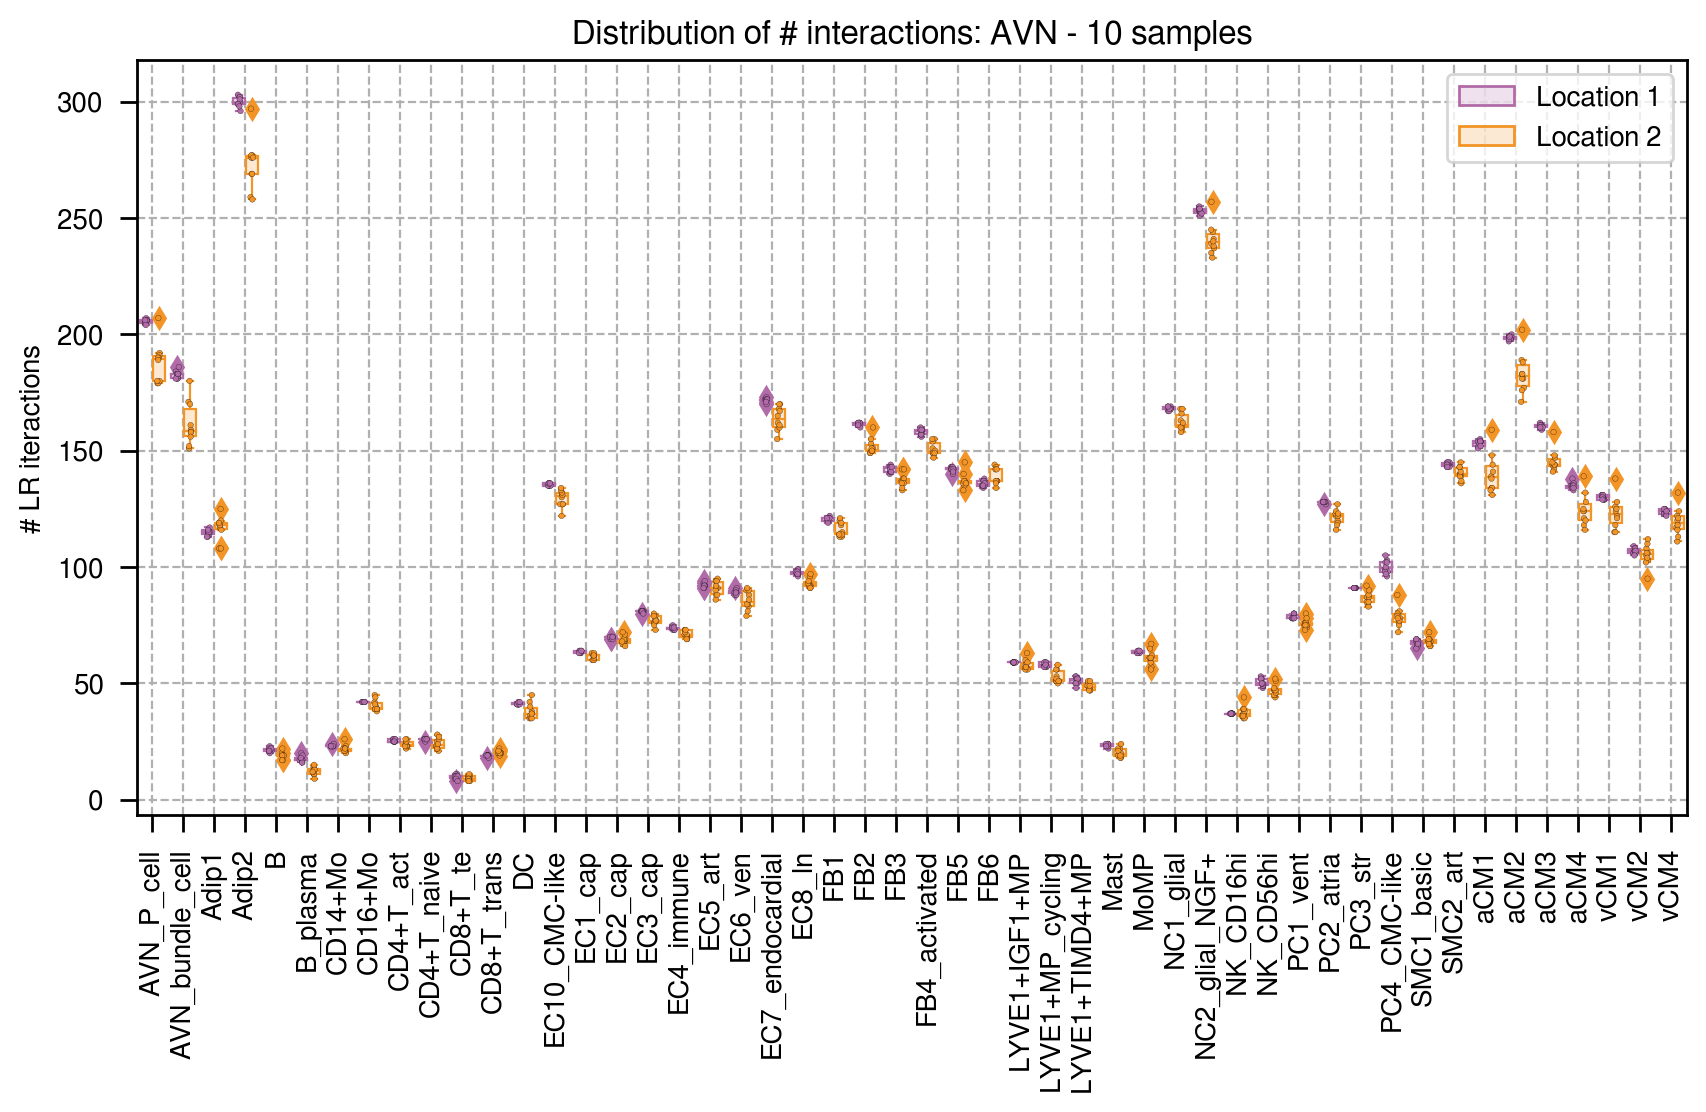

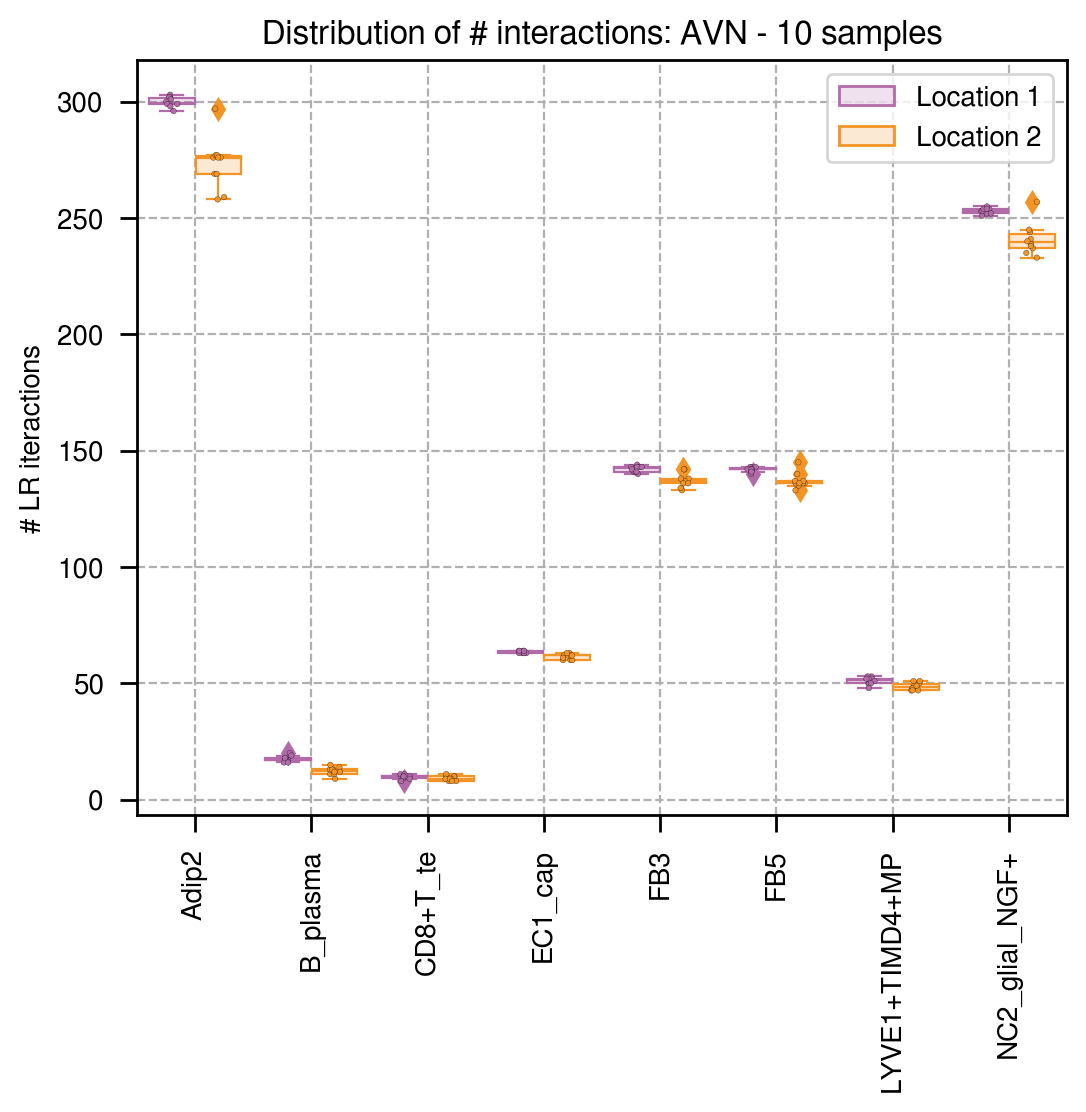

In [9]:
patient = 'AVN'
out_path = global_path +'Results/Heart/CellPhoneDB/Subsampling/'+patient+'/'

df_plot = pd.read_csv(out_path +'total_subsampling_results.csv')
df_plot = df_plot[~df_plot['index'].isin(cells[0])]
selected_cells = ['Adip2', 'NC2_glial_NGF+',  'B_plasma',  'CD8+T_te', 'FB5', 'FB3', 'EC1_cap', 'LYVE1+TIMD4+MP']

fig, ax = plt.subplots(figsize=(10, 5), dpi=200)
boxplot_subsampling(df_plot, ax, patient, ['#B16BA8', '#F39426'])
fig, ax = plt.subplots(figsize=(6, 5), dpi=200)
boxplot_subsampling(df_plot, ax, patient, ['#B16BA8', '#F39426'], selected_cells)


# SAN

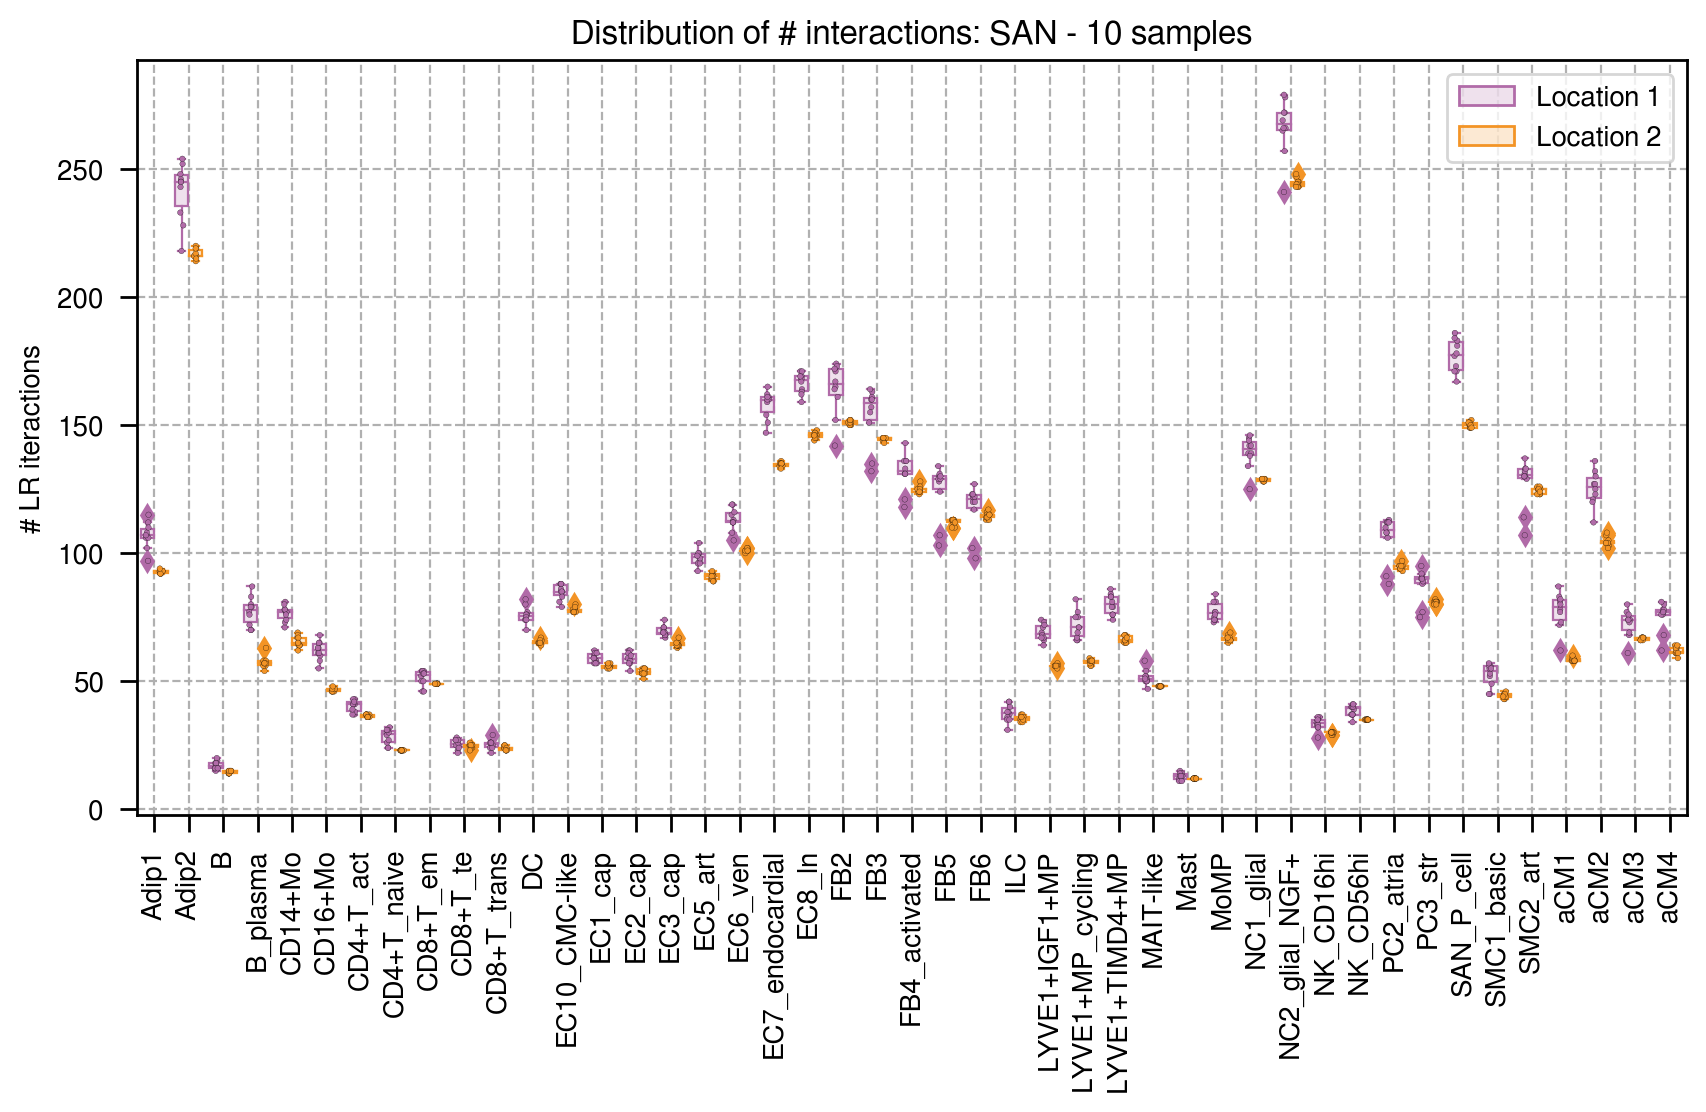

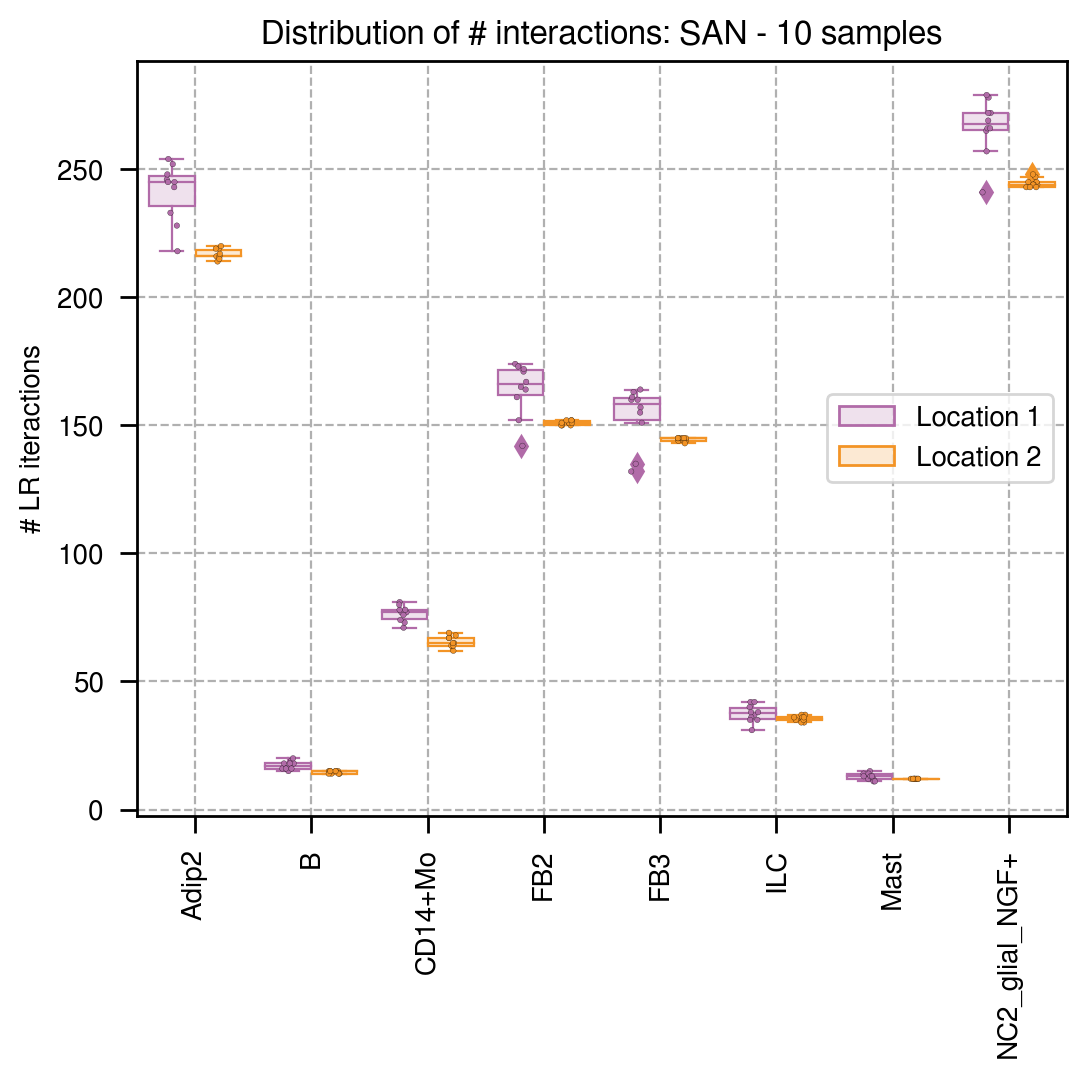

In [10]:
patient = 'SAN'
out_path = global_path +'Results/Heart/CellPhoneDB/Subsampling/'+patient+'/'

df_plot = pd.read_csv(out_path +'total_subsampling_results.csv')
df_plot = df_plot[~df_plot['index'].isin(cells[1])]
selected_cells = ['NC2_glial_NGF+', 'Adip2',  'B',  'Mast', 'FB2', 'FB3', 'ILC', 'CD14+Mo']

fig, ax = plt.subplots(figsize=(10, 5), dpi=200)
boxplot_subsampling(df_plot, ax, patient,['#B16BA8', '#F39426'])
fig, ax = plt.subplots(figsize=(6, 5), dpi=200)
boxplot_subsampling(df_plot, ax, patient,['#B16BA8', '#F39426'], selected_cells)

# GRID plot

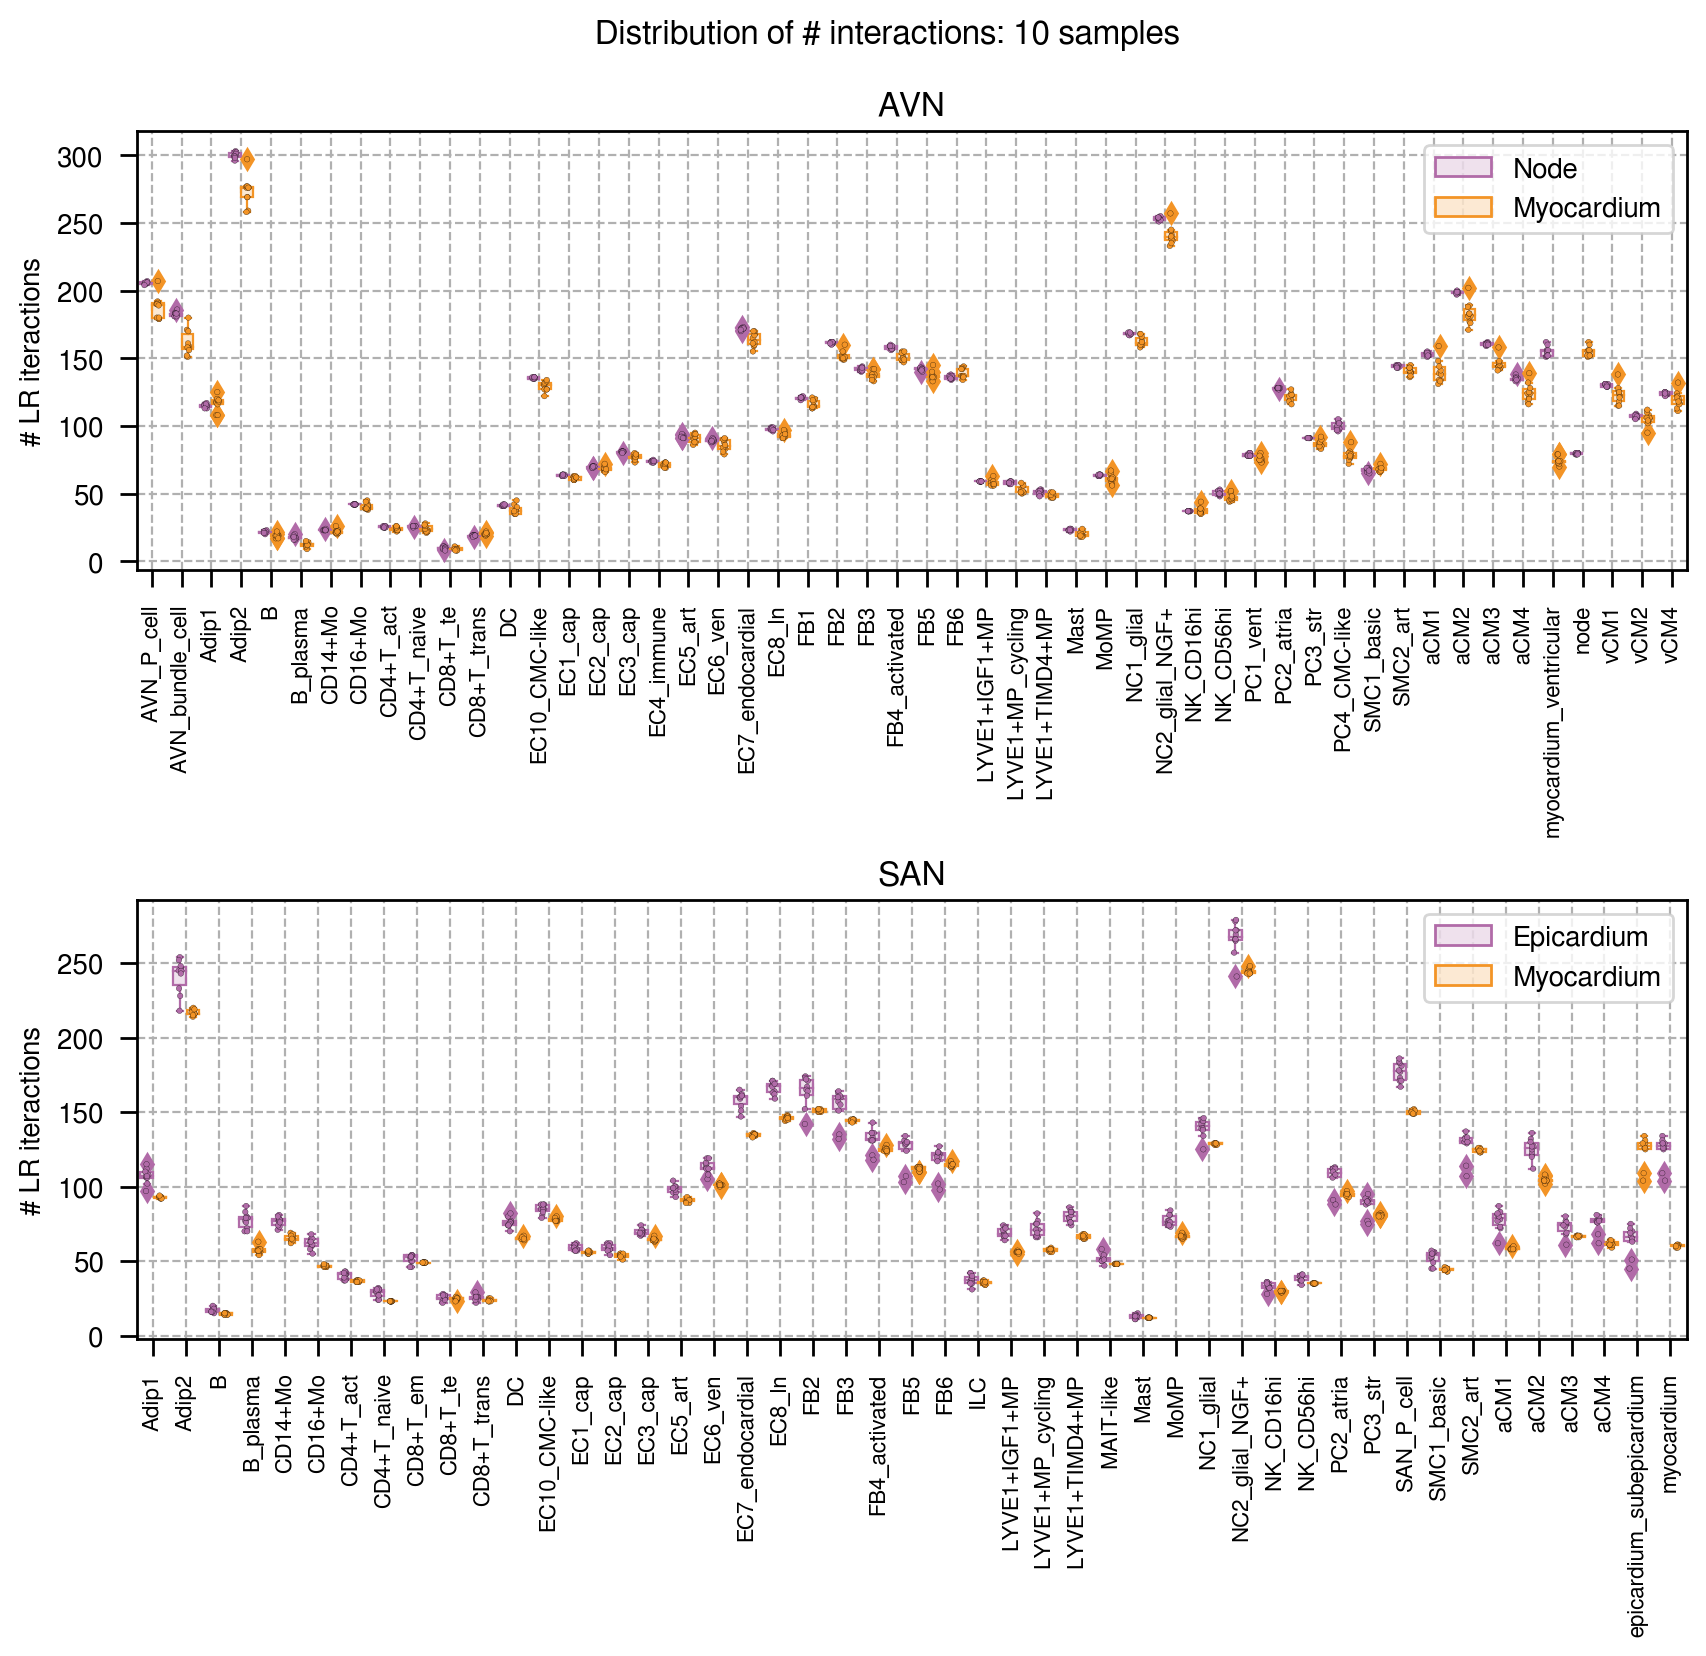

In [6]:
fig, ax = plt.subplots(2, 1, figsize=(10, 8), dpi=200)
plt.subplots_adjust(hspace=0.75)

ax = ax.flatten()

list_loc_labels = ['#B16BA8', '#F39426']
patient = 'AVN'
out_path = global_path +'Results/Heart/CellPhoneDB/Subsampling/'+patient+'/'
df_plot = pd.read_csv(out_path +'total_subsampling_results.csv')
df_plot = df_plot[~df_plot['index'].isin(list_loc_labels)]
boxplot_subsampling(df_plot, ax[0], patient, list_loc_labels, new_labels_l = ['Node', 'Myocardium'])
handles, labels = ax[0].get_legend_handles_labels()



patient = 'SAN'
out_path = global_path +'Results/Heart/CellPhoneDB/Subsampling/'+patient+'/'
df_plot = pd.read_csv(out_path +'total_subsampling_results.csv')
df_plot = df_plot[~df_plot['index'].isin(list_loc_labels)]
boxplot_subsampling(df_plot, ax[1], patient, list_loc_labels, new_labels_l = ['Epicardium', 'Myocardium'])



plt.suptitle('Distribution of # interactions: 10 samples', y = 0.95)

plt.savefig(global_path+'CP_sampling_heart.svg',format='svg', dpi=300 , bbox_inches='tight')
plt.savefig(global_path+'CP_sampling_heart.png',format='png', dpi=300, facecolor='white', edgecolor='none', bbox_inches='tight')